In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
data = pd.read_csv('./parkinsons.data')

In [2]:
X_train, X_test, y_train, y_test = train_test_split(data.drop(['name', 'status'], axis=1), data['status'], test_size=.2, random_state=7, stratify=data['status'])
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 7, stratify=y_test)

## Результаты на валидационных данных

In [6]:
bst = XGBClassifier(n_estimators=100, max_depth=20, learning_rate=0.4, objective='binary:logistic')

bst.fit(X_train, y_train)

preds = bst.predict(X_val)
report = classification_report(y_val, preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.93      1.00      0.97        14

    accuracy                           0.95        19
   macro avg       0.97      0.90      0.93        19
weighted avg       0.95      0.95      0.95        19



In [7]:
y_score = bst.predict_proba(X_val)[:, 1]

print('ROC AUC метрика')
roc_auc_score(y_val, y_score)

ROC AUC метрика


0.9571428571428572

## Результаты на тестовых данных

In [12]:
preds = bst.predict(X_test)
report = classification_report(y_test, preds)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00        15

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [11]:
y_score = bst.predict_proba(X_test)[:, 1]

print('ROC AUC метрика')
roc_auc_score(y_test, y_score)

ROC AUC метрика


1.0

Text(0.5, 1.0, 'Матрица ошибок')

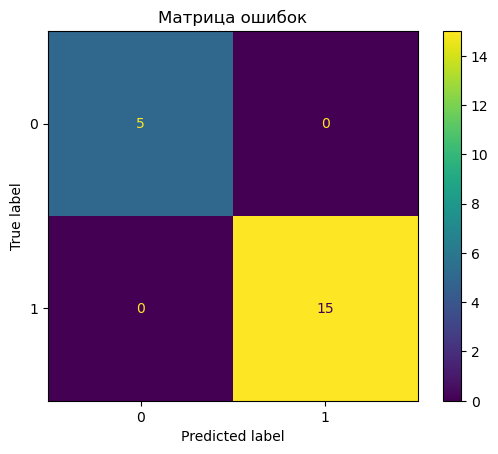

In [10]:
fig, ax = plt.subplots()
ConfusionMatrixDisplay.from_predictions(y_test, preds, ax=ax)
ax.set_title("Матрица ошибок")